In [86]:
import time
import pandas as pd
from datetime import datetime, timedelta

In [87]:
quotes = [
    {'code': 'EURUSD', 'market': '5', 'em': '83'},
    {'code': 'GBPUSD', 'market': '5', 'em': '86'},
    {'code': 'USDCHF', 'market': '5', 'em': '85'},
    {'code': 'USDJPY', 'market': '5', 'em': '87'}
]

In [88]:
class Trade:    
    
    def __init__(self, quotes):
        self.quotes = quotes
        self.data = pd.DataFrame()
        
        self.edate = datetime.now()
        delta = timedelta(days=7)
        self.sdate = self.edate - delta

        self.e1 = self.edate.strftime('%d.%m.%Y')
        self.s1 = self.sdate.strftime('%d.%m.%Y')

        self.e2 = self.edate.strftime('%y.%m.%d')
        self.s2 = self.sdate.strftime('%y.%m.%d')

        self.edate = datetime.timetuple(self.edate)
        self.sdate = datetime.timetuple(self.sdate)
        self.ey, self.em, self.ed = self.edate[:3]
        self.sy, self.sm, self.sd = self.sdate[:3]
    
    def get_url(self, code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, e):
        sd, sm, sy, ed, em, ey = str(sd), str(sm-1), str(sy), str(ed), str(em-1), str(ey) 
        return ('http://export.finam.ru/{0}_{1}_{2}.csv?market={11}&em={12}&code={0}&apply=0&df={3}&mf={4}&yf={5}&' +\
               'from={6}&dt={7}&mt={8}&yt={9}&to={10}&p=7&f={0}_{1}_{2}&e=.csv&cn={0}&dtf=1&tmf=1&MSOR=1&mstime=on&' +\
               'mstimever=1&sep=3&sep2=1&datf=5&at=1').format(code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, e)
    
    def make_dataset(self, url):
        self.data = pd.read_csv(url, parse_dates={'Date & Time': [0, 1]}, index_col=0, sep=';')
        self.data.rename(lambda x: str.lower(x[1:-1]), axis='columns', inplace=True)
        self.data['sma9'] = self.data.close.rolling(window=9).mean()
        self.data['sma19'] = self.data.close.rolling(window=19).mean()
        return self.data
    
    def analyze(self, data, quote):
        if self.data.sma9[-3] < self.data.sma19[-3] and self.data.sma9[-2] > self.data.sma19[-2]:
            print('Buy {}'.format(self.quote['code']))
        self.data.iloc[:, [3, 5, 6]].plot(figsize=(16, 8), grid=True)
            
    def main(self):
        for q in self.quotes:
            time.sleep(1)
            url = self.get_url(q['code'], self.s1, self.e1, self.sd, self.sm, self.sy,
                               self.s2, self.ed, self.em, self.ey, self.e2, q['market'], q['em'])
            self.analyze(self.make_dataset(url), q)


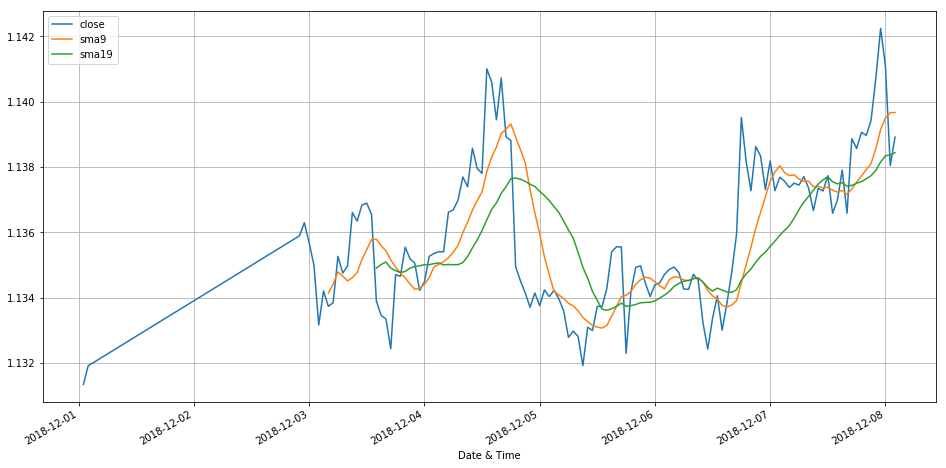

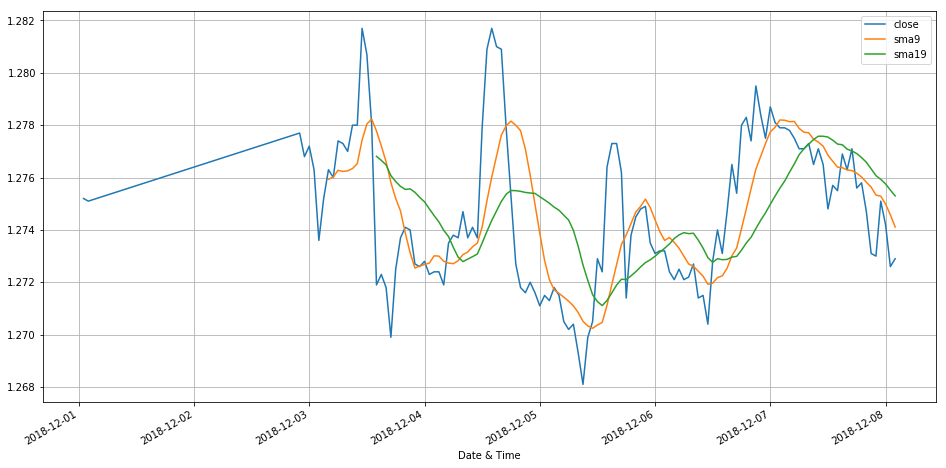

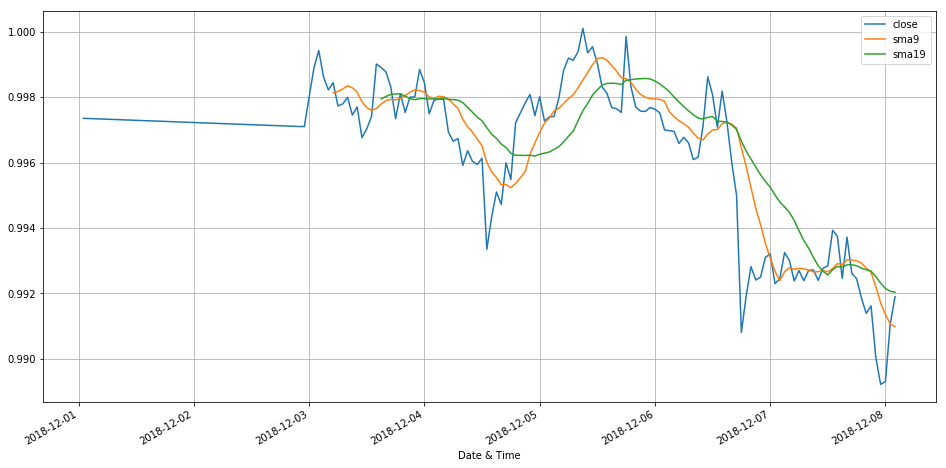

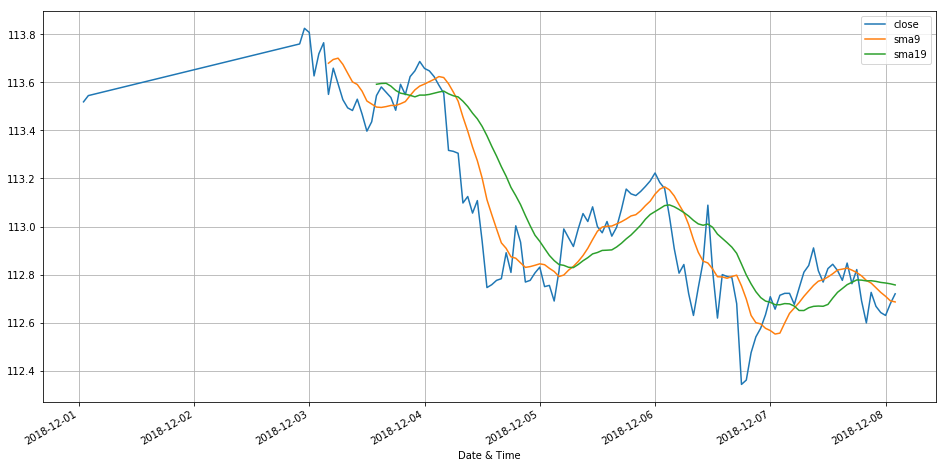

In [89]:
trade = Trade(quotes)
trade.main()